In [288]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [289]:
%autoreload 2

In [290]:
import importlib
importlib.reload(processes)
from processes import *
import cv2
from matplotlib import pyplot as plt
import numpy as np
import argparse
import math

Creating Images

Width: 509 pixels
Height: 537 pixels


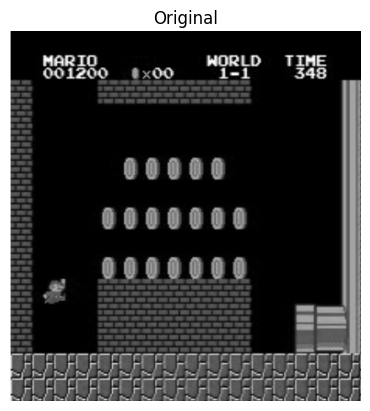

Width: 27 pixels
Height: 44 pixels


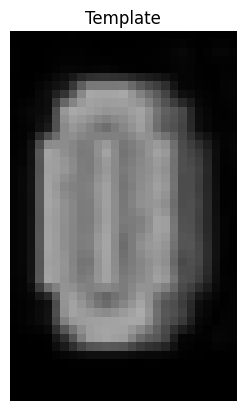

In [291]:
originalImage = cv2.imread("../images/marioGame.png", cv2.IMREAD_GRAYSCALE)
templateImage = cv2.imread("../images/coin.png", cv2.IMREAD_GRAYSCALE)

image = originalImage.copy()
template = templateImage.copy()
height, width = image.shape[:2]  # shape returns (height, width, channels)

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")

display_image(image, "Original")

height, width = template.shape[:2]  # shape returns (height, width, channels)

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")
display_image(template, "Template")

w, h = template.shape[::-1]

TM_CCOEFF Method

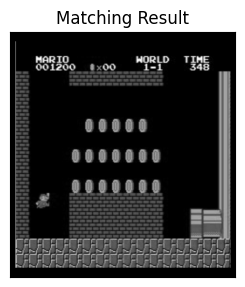

13
22

Matching Result Dimensions
Width: 509 pixels
Height: 538 pixels

Detected Pint dimensions
Width: 491 pixels
Height: 555 pixels


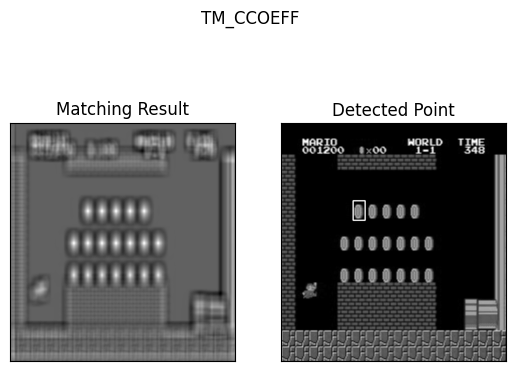

In [292]:
img = create_border(image.copy(), template)
#img = image.copy()
method = getattr(cv2, "TM_CCOEFF")

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.show()
# Apply template Matching
res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
top_left = max_loc
top_left = (top_left[0] - w // 2, top_left[0])
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(image,top_left, bottom_right, 255, 2)

img = remove_border(img, image.copy(), template)

print("\nMatching Result Dimensions")
height, width = res.shape[:2]  # shape returns (height, width, channels)

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(image,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle("TM_CCOEFF")

print("\nDetected Pint dimensions")
height, width = image.shape[:2]  # shape returns (height, width, channels)

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")